##### 準備
最初データの読み込みに少し時間がかかりますので、下のブロックの中にマウスカーソルを置いて左クリックし、 **Shift キーを押しながら Enter**を押しておいてください。Shift+Enter でそのブロックのプログラムが実行されます。

In [1]:
import pysrc.placenetVgg2 as pp                  #   枠内でShift を押しながらEnterしてください

# 一般物体認識
(このデモプログラムはChromeブラウザでご覧ください）

写真や絵の中に写っているものが何かをこたえることは皆さんには特に難しいことではありませんね。

わたしたちはパッと一目見ただけで見たものが何であるかを認識できます。例えば下の写真がどういうシーンを写したものか、誰でもすぐにわかります。

![](https://goo.gl/yC2Enf)

人がホームを歩いていることや、電車が停まっていることも、小さくて見えないけども時計があることもわかりますし、一番手前の人がおそらく女性であり、帽子を被っていること、傘を持っていること、だからこの日は雨だったのかな、というところまでわかります。

このようなモノの認識は**一般物体認識**とよばれます。工場で決まったものをを工作するロボットや、ロボットサッカーのロボットは、それはそれでとても難しい技術から成り立っていますが、彼らは特定のものだけを見て認識したらいいだけなので、「認識」処理自体は一般物体認識と比べればとても簡単です。（それでも十分難しい。）　

最近よく話題になる自動運転でさえ、一般物体認識と比べればずいぶん簡単です。道路上にあるものだけを対象とすればいいですし、障害物かそうでないか、それがどう障害になるかだけわかればいいですから。

これまでコンピュータは**パターン認識**が苦手だとされてきました。とりわけ一般物体認識は苦手でした。

## ILSVRC 
ILSVRCは一般物体認識の精度を競う競技会で、2010年から始まりました。当初は従来の画像認識技術を踏まえたさまざまなアプローチで競われていましたが、2012年にトロント大学のチームがディープニューラルネットを用いたプログラムでぶっちぎり優勝して以来、最近はほとんどの参加者がディープラーニングという人工知能技術を利用しています。

この大会の成果の多くは公開されて再利用可能となっています。

以下でお見せするデモプログラムは、そのうちのひとつである、オックスフォード大学の研究チームが公開している学習済みモデル（2014準優勝）を利用して作りました。


 ||||
 |:--:|:--:|:--:|:--:|
 |　　|<img src="https://goo.gl/fCecNj" width="450">|<img src="https://goo.gl/t4JUfK" width="300">|　　|

- [ILSVRC カテゴリ](http://localhost:8888/edit/pysrc/modeldata/jcategories.txt)

# <span style="color: red;">  ☆☆スタート☆☆</span>
# 実験1　画像内容識別

In [3]:
from ipywidgets import interact, interactive
interact(pp.predict, url="https://goo.gl/ZiirT2");

A Jupyter Widget

## 使い方
 url のボックスの中に認識させたい画像の URL をはりつけてEnterすれば認識結果が表示されます。
 
 <hr>

### テスト画像

||||||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|![](https://goo.gl/qhnMce)|<img src="https://goo.gl/j6zq9g" width="600">|![](https://goo.gl/rKzvJw)|![](https://goo.gl/c4YGXB)|![](https://goo.gl/SGneEZ)|![](https://goo.gl/cz7pgE)|<img src="https://goo.gl/853iBW" width="512">|<img src="https://goo.gl/dJTemk" width="256">|![](https://goo.gl/eaVAeu)|![](https://goo.gl/7qLQXW)|
↑ 右クリックして「画像アドレスをコピー」してください。

### google 画像検索

||||||
|--:|:--:|:--:|:--:|:--:|
|右クリックし、新しいウィンドウで開いて下さい→|<a href="https://goo.gl/zeb5pM"> ![動物](https://user-images.githubusercontent.com/5820803/30189909-c54acd10-9471-11e7-809e-5731dc3d239b.PNG)</a>|<a href="https://goo.gl/dZ7Vp2">![植物](https://user-images.githubusercontent.com/5820803/30190043-93863f20-9472-11e7-8dda-bd50c807f20a.PNG)</a>|<a href="https://goo.gl/FGnvS1">![爬虫類](https://user-images.githubusercontent.com/5820803/30189856-8806e40c-9471-11e7-9a4a-adfd718307b0.PNG)</a>|<a href="https://goo.gl/yuDj9L">![建造物](https://user-images.githubusercontent.com/5820803/30190014-658082d4-9472-11e7-96d8-0cbc43b105de.PNG)</a>|
||||||


対象としたい画像を選んでクリック、画像右横に出る　** 「画像を表示」 ** のボタンを押してその画像のみを表示し、右クリックメニーの「画像アドレスをコピー」するか、ブラウザ上部に表示されている URL をコピーしてください。

### <a href="http://image-net.org/explore" target="_blank">ImageNet</a> 
ジャンルを検索窓に入力するか（ただし英語）、左の分類ツリーをクリックしていくと画像が表示されますので、画像が一つだけになるまでクリックを繰り返し、右クリックメニーの「画像アドレスをコピー」するか、ブラウザ上部に表示されている URL をコピーしてください。

 <hr>

#### 画像のURLについての注意
URL の末尾が jpg や png などの画像の拡張子であることを確認してから下の url の箱にペーストしてください。
 サイトによっては画像へのアクセスが拒否される場合もあります。エラーが出た場合は別の URL  でチャレンジしてみてください。


# 実験準備１　グレイ化
カラー画像をモノクロ画像に変換する処理はもっとも簡単な画像処理のひとつです．

$$ Gray = ( 0.298912 R + 0.586611  G + 0.114478 B ) $$

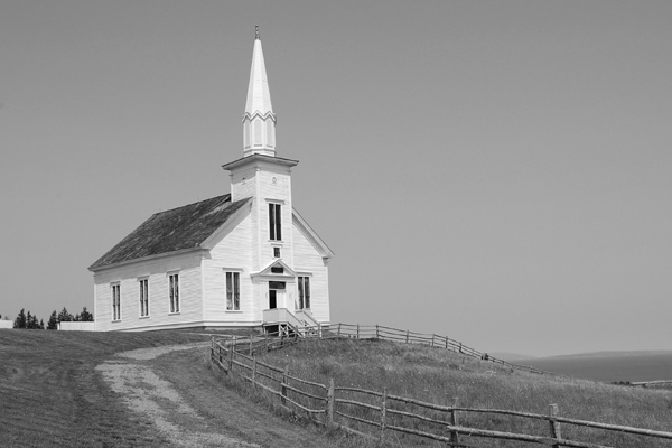

In [4]:
import cv2, numpy
from PIL import Image
gray  = cv2.cvtColor(numpy.asarray(pp.pubimg), cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

**画像が表示されたら** 右クリックでデスクトップに保存してください．名前はなんでもかまいません．

# 実験準備２　線画化
エッジ検出という画像処理を施せば線画化できます．エッジ検出はパターン認識の手掛かりをえるためのもっとも基本的な処理です．

エッジ検出の基本は高校の数IIで習う**微分**です。明るさをｘとｙの関数ととらえ、ｘ、ｙで微分するとそれぞれの方向に沿った明るさの傾きが得られます。エッジの位置では明るさが大きく変化するので微分値は大きく、明るさの変化の少ない場所では微分値は０に近くなります。ものの輪郭は明るさの変化が大きいので微分値は大きくなります。微分値の大きな点を黒で描いていけば線画っぽいものができあがります。

<img src="https://goo.gl/6TtxwQ" width=20%>

ただ、一般のシーンでは明るさの変化が複雑すぎるので、そのまま微分すると上の図のようにエッジが出すぎて線画として使うのに向きません。そこで、次のプログラムではまず画像をわざとぼかしてからエッジ検出を施しています。

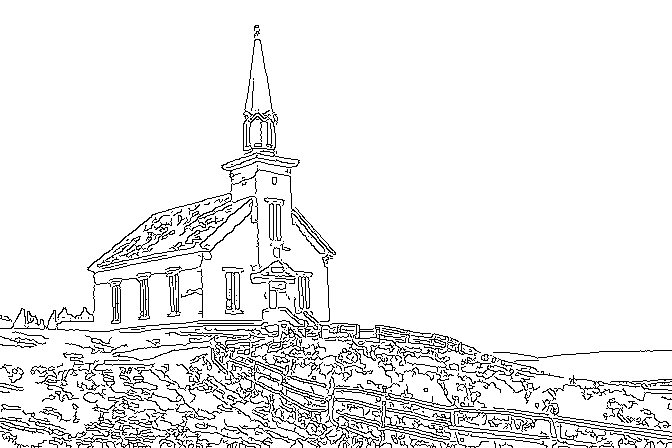

In [5]:
gray = cv2.GaussianBlur(gray, (5,5), 0)  # 　ガウスぼかし
pic_edges = cv2.bitwise_not(cv2.Canny(gray, threshold1=20, threshold2=60))  # エッジ検出して白黒反転
Image.fromarray(cv2.cvtColor(pic_edges, cv2.COLOR_GRAY2RGB))

**画像が表示されたら**  右クリックでデスクトップに保存してください．名前はなんでもかまいませんが、先に保存したグレイ画像とは別の名前にしてください．.
**ノイズが多いと感じる場合**はShift+Enterを何度か繰り返してみみててください．実行するたびに線が減っていきます。
減らしすぎてしまった場合はグレイ化のブロックからやり直してください．

# 実験２　自動着色

- <a href="http://hi.cs.waseda.ac.jp:8082" target="_brank"> 白黒写真の自動色付け </a>
- <a href="https://paintschainer.preferred.tech/index_ja.html" target="_blank"> Paint Chainer 線画の色付け</a>

この二つは外部サイトです．これらの処理には，いずれもディープニューラルネットワークという技術が使われています．

### ソースコード
ソースプログラムを下に示しておきます。学習済みモデルを用いているので認識自体は

> ```y, = vgg(inputs={'data': x}, outputs=['fc8a'])```

の1行です。ｘが画像で、ｙに1365あるカテゴリすべての可能性を表す数値のリストが返ってきます。

この行以外の部分はネット上の画像を読み込んで形式を合わせたり、上位5位までを取り出して単語として表示したりするためのプログラムコードになっています。

＃　ソースコード   placenetVgg2.py
```
# import chainer
import chainer.functions as F
from chainer import Variable
import PIL.Image
import numpy as np
import io
import urllib.request

from chainer.links.model.vision.vgg import prepare as VGGprepare
import pickle

vgg = pickle.load(open('pysrc/modeldata/vgg16_hybrid1365.pkl', 'rb'))

mean = np.array([103.939, 116.779, 123.68])   # BGR
# blob データを PIL 画像に変
def blob2img(blob, mean=mean):
    blob = (np.dstack(blob)+ mean)[:,:,::-1]   # BGR 2 RGB
    return PIL.Image.fromarray(np.uint8(blob))

# 確率リストとしての出力からトップ５を出力するメソッド2
# 日本語化済みのカテゴリリストを用いる
f = open("pysrc/modeldata/jcategories.txt",'r',encoding="utf-8")
jcategories={}
for n in range(1365):
    jcategories[n]=f.readline()[:-1]
f.close()

def showtop2(prob, ranklimit=5): # prob は最終層から出力される確率リスト（Variable構造体)
    top5args = np.argsort(prob.data)[:-ranklimit-1:-1] # 上位５つの番号
    top5probs = prob.data[top5args] # 上位５つの確率
    for rank,(n, p) in enumerate(zip(top5args,top5probs)):
        print("{} {} ({:7.5f})".format(rank+1,jcategories[n], top5probs[rank]))

def url2img(url):
    # print(url)
    if url[:16] == "http://localhost":
        pic = url.rsplit('/',1)[1]
        f = open("pics/"+pic,'rb')
    elif url[:4] != "http":
        f = open(url,'rb')
    else:
        f = io.BytesIO(urllib.request.urlopen(url).read())
    img = PIL.Image.open(f)
    w,h = img.width, img.height
    if w > h:
        w1, h1 = int(448/h * w), 448
    else :
        w1,h1 = 448, int(448/w * h)
    return img.resize((w1,h1))

def predict(url=""):
    global pubimg
    if len(url) < 10 :  # おそらく操作ミスの場合
        return np.zeros((3,244,244))
    pubimg = url2img(url)
    x = Variable( VGGprepare(pubimg)[np.newaxis,])
    y, = vgg(inputs={'data': x}, outputs=['fc8a'])
    predict = F.softmax(y)
    showtop2(predict[0])
    return pubimg
```


![](https://www.cs.toronto.edu/~frossard/post/vgg16/vgg16.png)
![vgg16](https://user-images.githubusercontent.com/5820803/30191230-6843cc62-947a-11e7-8313-8dd787357f97.png)


### 学習済みモデル
このプログラムでは、MITが後悔している　　place365hybrid という、一般の物体とシーンを対象とした学習済み CNN(畳み込みネットワーク）を使っています。　https://github.com/CSAILVision/places365

このネットワークは、、一般物体認識は ILSCVR とよばれるコンテストで用いられている 1000カテゴリと Place Net の 365のカテゴリを合わせた 1365 のカテゴリについて、与えられた画像の被写体である確率を出力します。このプログラムでは確率の上位5つを表示しています。


![](https://user-images.githubusercontent.com/5820803/29495822-f3616386-8601-11e7-9844-2fcd1a249468.gif)

# 関連するトピックス

- [派生プログラム（淡）](https://gist.github.com/aquapathos/e7bb81a3bdd1a97f9337df4bc493a15a) 上のヒマワリの絵を作ったプログラム
- [写真に絵画風に加工するプログラム（淡）](https://research.preferred.jp/2015/09/chainer-gogh/)  
- [画風を変換するアルゴリズム](https://research.preferred.jp/2015/09/chainer-gogh/)
- [Google Deep Dream](https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)
